In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
run_no = 1
rundays = 365
runhours = rundays*24

hr_range = pd.date_range('1/1/2016', periods=runhours, freq='H')
day_range = pd.date_range('1/1/2016', periods=rundays, freq='D')


In [3]:
line_data = pd.read_csv('data_laos_transparam_2016.csv',header=0)
vlt_angle = pd.read_csv('out_laos_2016_R1_vlt_angle.csv',header=0)

In [14]:
####======== Lists of Nodes of the Power System ========########
h_nodes = ['HouayHo','HouayLamphan','NamKhan2','NamKhan3','NamLeuk','NamLik1n2',
           'NamMang1','NamMang3','NamNgiep2','NamNgiep2C','NamNgiep3A',
           'NamNgum1','NamNgum2','NamNgum5','NamOu2','NamOu5','NamOu6',
           'NamSan3A','NamSan3B','NamSana','NamTheun2','Salabam','TheunHinboun',
           'Xekaman1','Xekaman3','Xenamnoy1','Xenamnoy6','Xeset1','Xeset2','Xeset3']

h_imports = ['EGATSirindhorn']

gn_nodes = ['HongsaLignite','Mitlao','HougAnh','EGATBungkan','EGATMukdahan','ChinMengLa'] ##Gen_nodes without demand

gd_nodes = ['Nasaithong','EGATRoiEt2','EGATUbon2','EGATUdon3',
            'EGATNongKhai','EGATMaeMoh','EGATNakhouPhanom','EGATSakonNakhou',
            'VietPleiKu','VietThanhMy','CambKhampongsalao'] ##Gen_nodes with demand

g_nodes = gn_nodes + gd_nodes ##All Thermoplant nodes 
##print ('Gen_Nodes:',len(g_nodes))

td_nodes = ['BanDon','BangYo','BanHat','BanNa','BanNathone','BMet','Bountari','BPompik',
            'Donkoi','Hinheup','HouycaiMining','Jiangsai','Kasi','KCLCement','Khoksaad',
            'Khonsong','LuangNamtha1','Luangprabang1','Luangprabang2','Mahaxai','MahaxaiCement',
            'MPhin','Nahor','NakadokMinning','NaMo2','Nongbong','Nongdeun','NonHai','Oudomsay',
            'Pakbo','Paklay','Pakmong2','Paksan','Paksong','Paktang','PhoneSoung','Phonsavan',
            'Phontong','PhubiaMinning','Sapaothong','SeinSouk','SeponMinning','Taothan',
            'Thabok','Thakhek','Thalath','Thanaleng','ThaNgon','Thasala','Thavieng','Tongkhoun1',
            'Tongkhoun2','Veingkam','Viengkeo','Viengvieng','Xamneual','Xayabury','XiengNgum'] ##Transformers with demand

tn_nodes = ['BanVean','NabongWest','Nabong','NaMoSwitch'] ##Transformers without demand

d_nodes = gd_nodes + td_nodes
##print ('Demand_Nodes:',len(d_nodes))

all_nodes = h_nodes + h_imports + gn_nodes + gd_nodes + tn_nodes + td_nodes ## + s_nodes + w_nodes
##print ('Total_Nodes:',len(all_nodes))

indx = 0

trans_data = [[] for n in range(5)]
trans_mwh = []
trans_usage = []

import warnings
warnings.filterwarnings('ignore')

for x in all_nodes:
    for y in all_nodes:
        if (line_data.loc[(line_data.source==x) & (line_data.sink==y),'linesus'].values) > 0: ##
            indx += 1
            
            sus = line_data.loc[(line_data.source==x) & (line_data.sink==y),'linesus'].values ##single value
            cap = line_data.loc[(line_data.source==x) & (line_data.sink==y),'linemva'].values ##single value
            
            vlt_angle_x = vlt_angle.loc[vlt_angle['Node']==x,'Value'].values ##all hourly values 
            vlt_angle_y = vlt_angle.loc[vlt_angle['Node']==y,'Value'].values ##all hourly values 
            
            vlt_angle_diff = vlt_angle_x - vlt_angle_y
            
            line_trans = vlt_angle_diff * sus
            line_usage = abs(line_trans)*100/cap ##percentage of line_usage
            
            trans_data[0].append(x)
            trans_data[1].append(y)
            
            trans_data[2].append(sus[0])
            trans_data[3].append(cap[0])
            
            trans_data[4].append(line_trans)
            
            trans_mwh.append(line_trans)
            trans_usage.append(line_usage) 

            #print (indx, x, y,sus)           

len(trans_mwh)

123

In [12]:
#trans_mwh

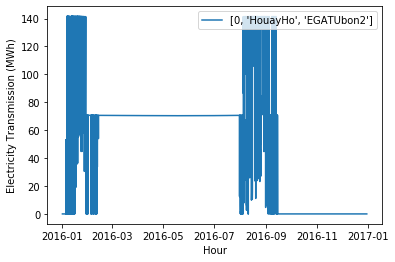

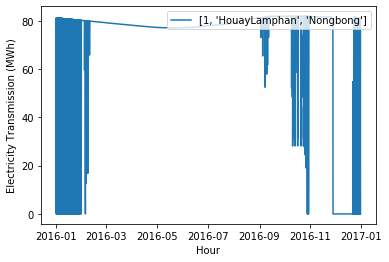

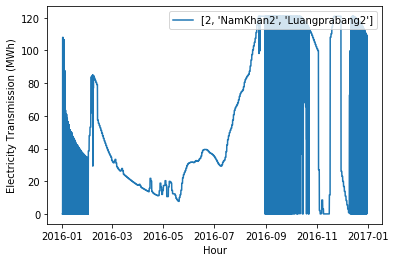

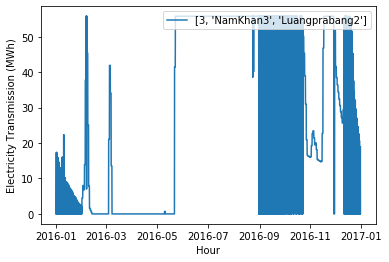

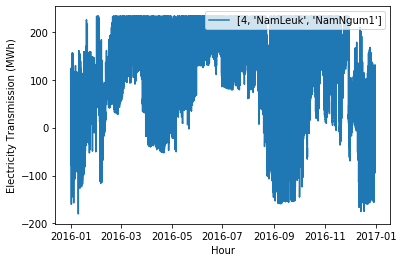

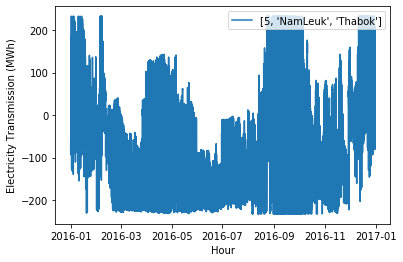

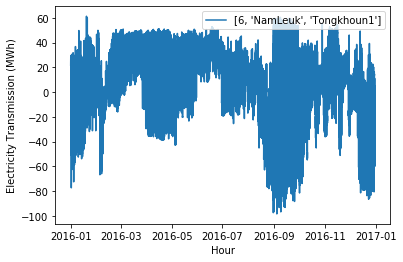

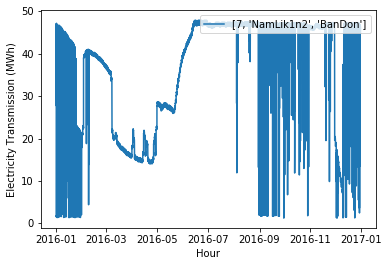

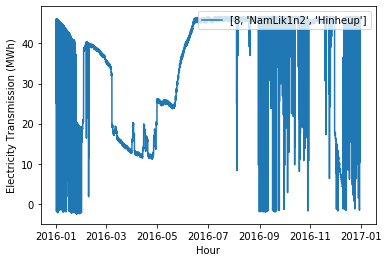

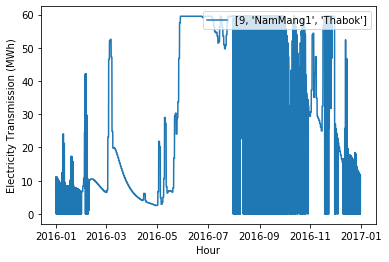

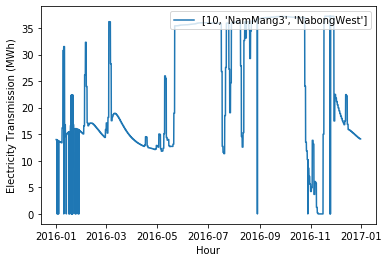

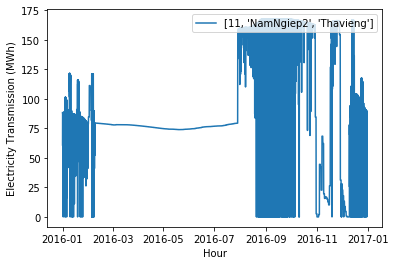

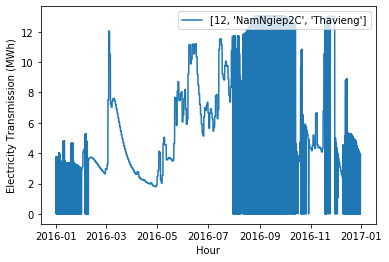

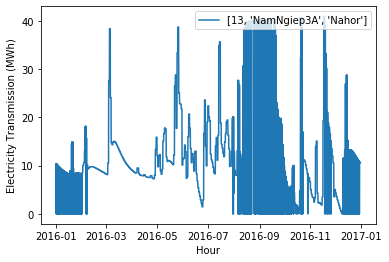

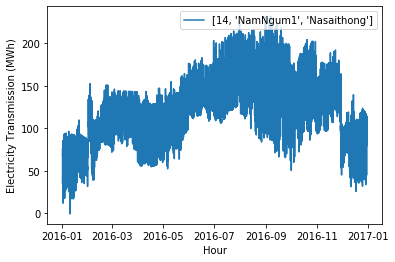

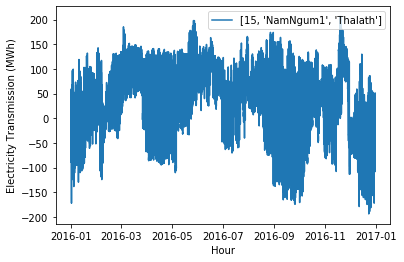

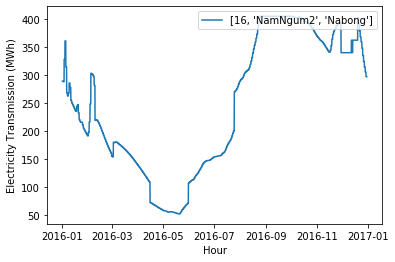

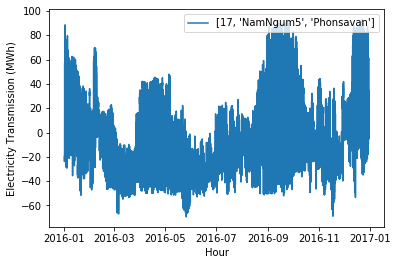

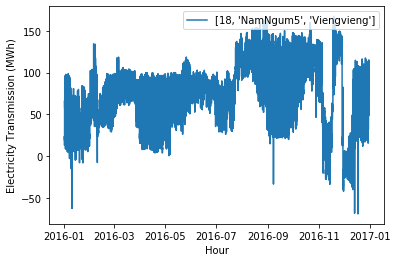

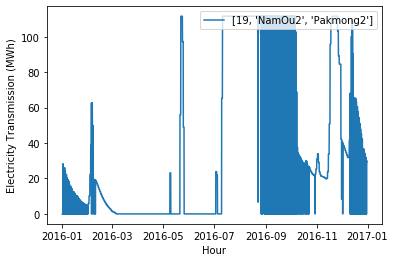

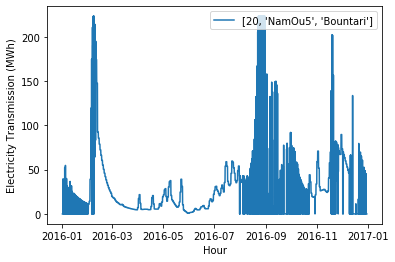

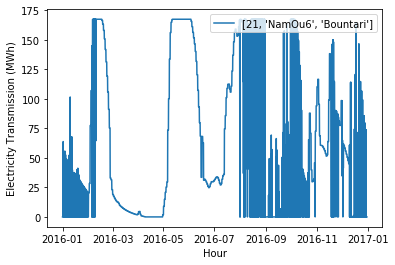

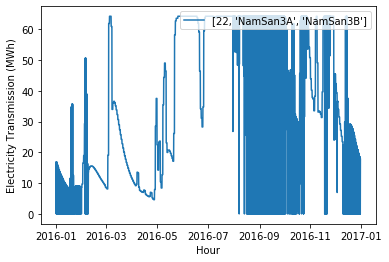

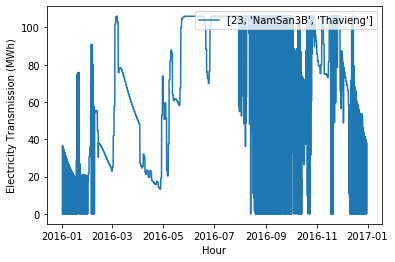

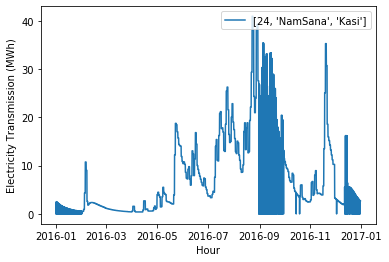

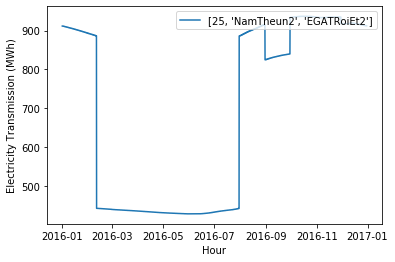

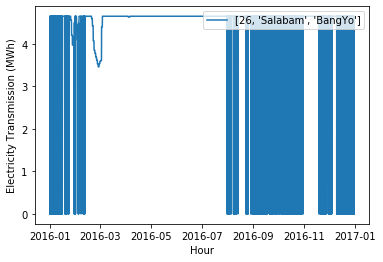

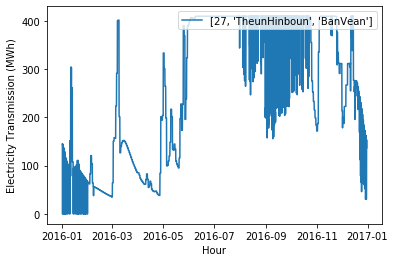

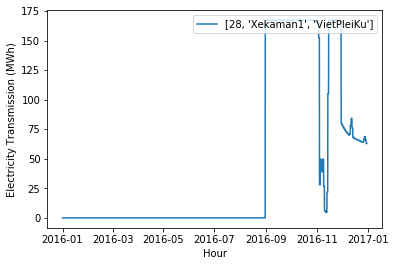

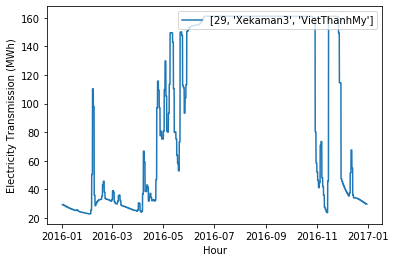

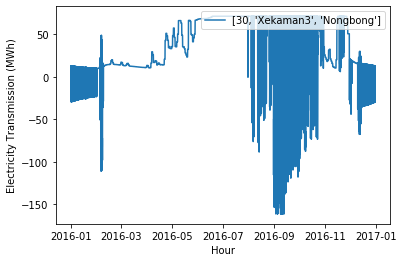

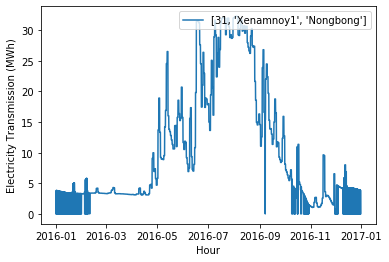

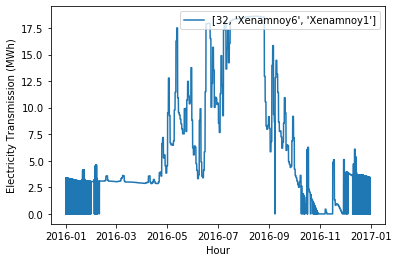

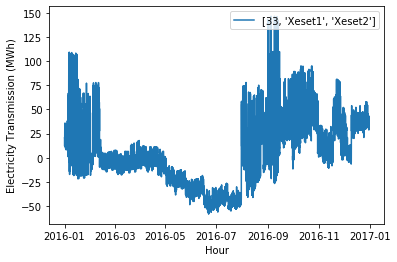

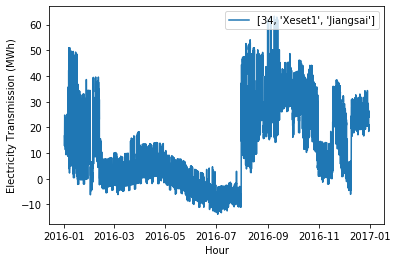

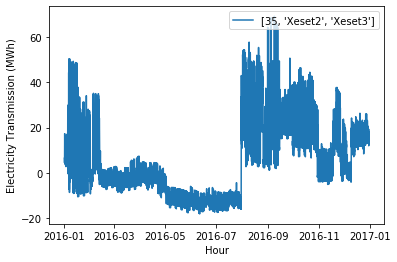

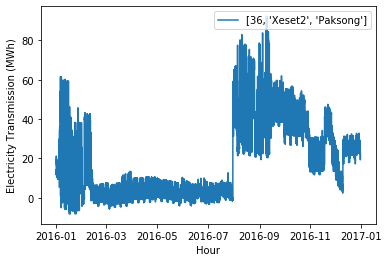

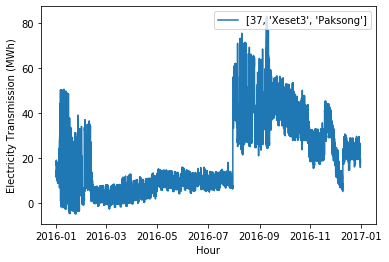

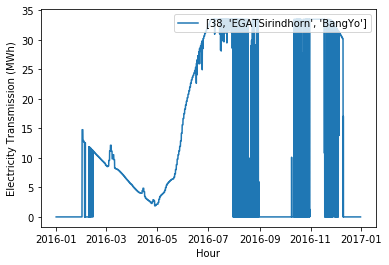

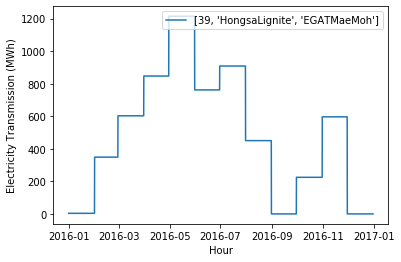

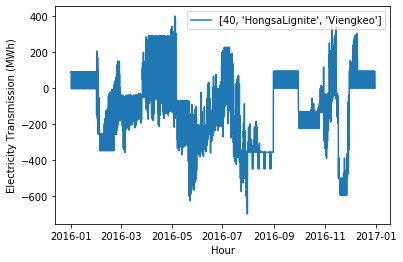

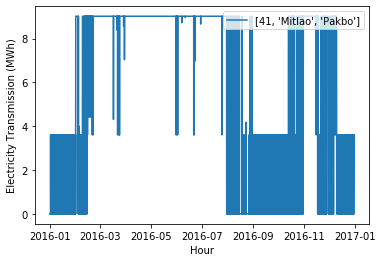

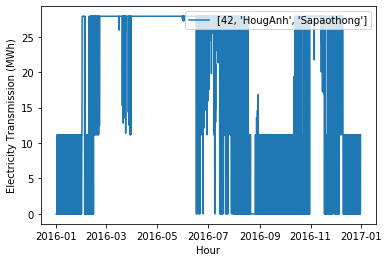

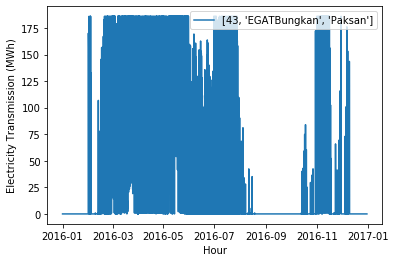

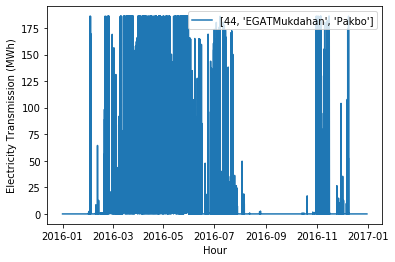

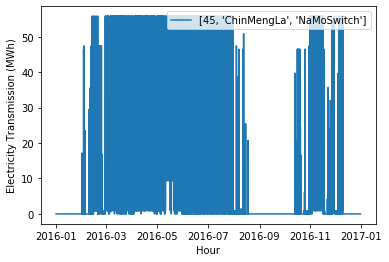

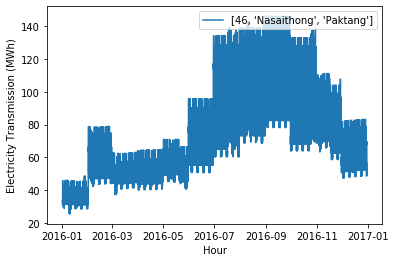

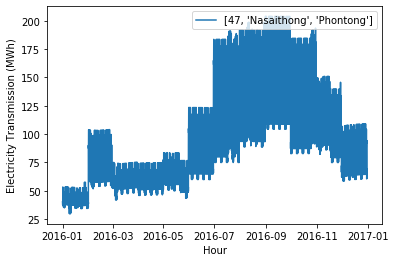

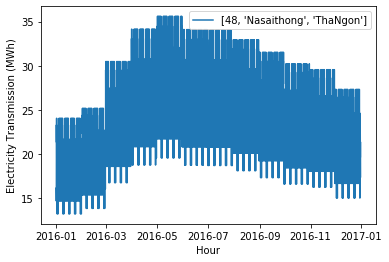

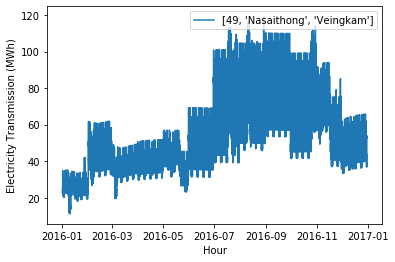

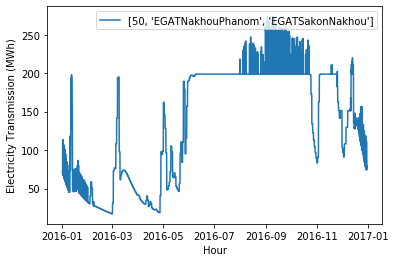

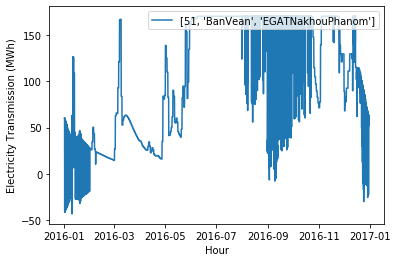

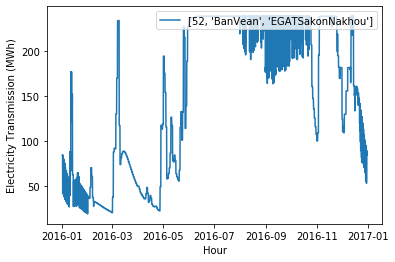

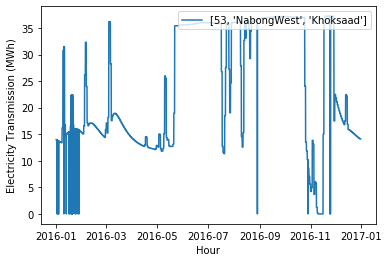

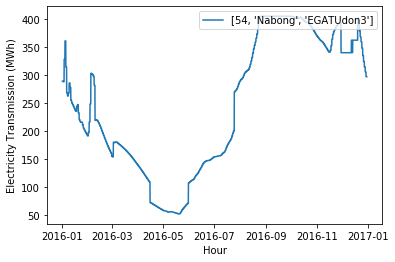

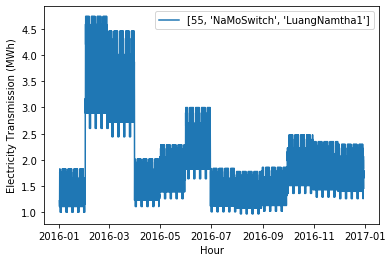

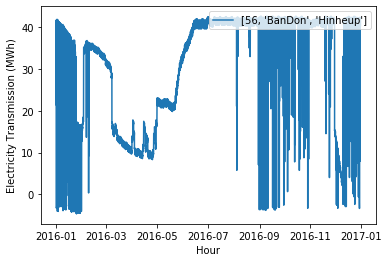

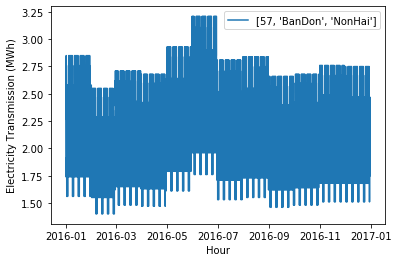

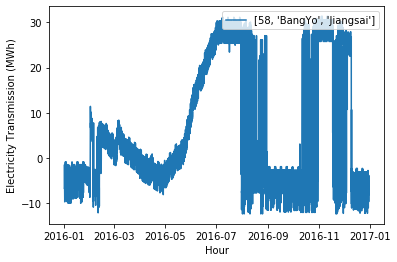

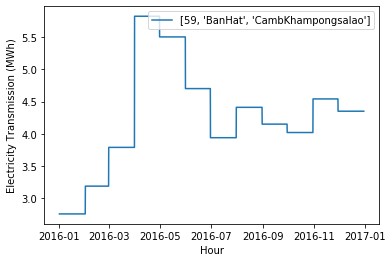

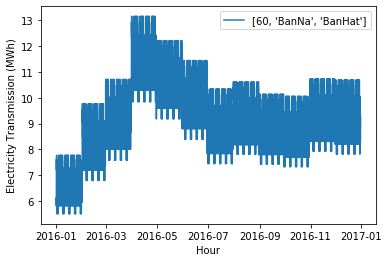

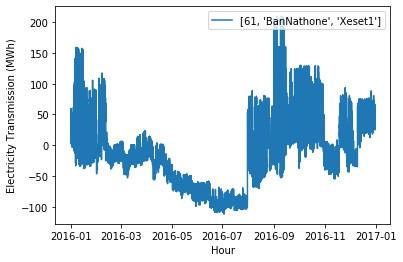

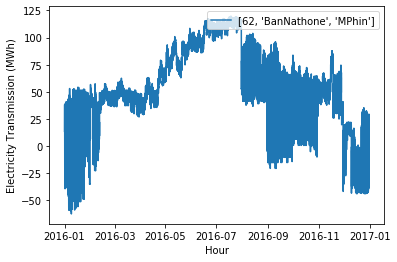

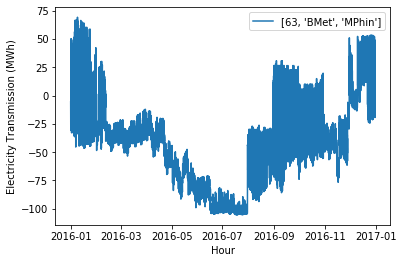

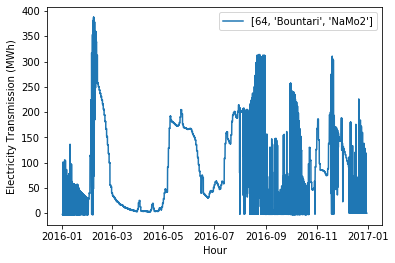

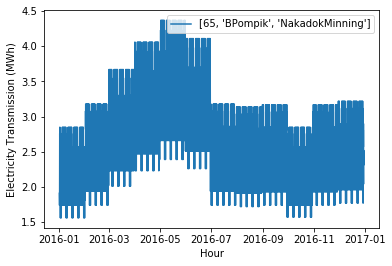

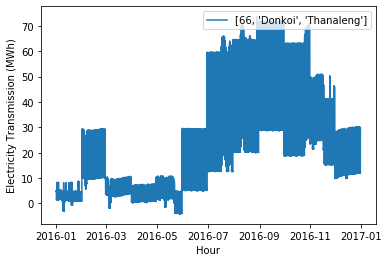

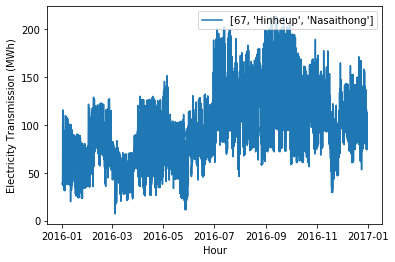

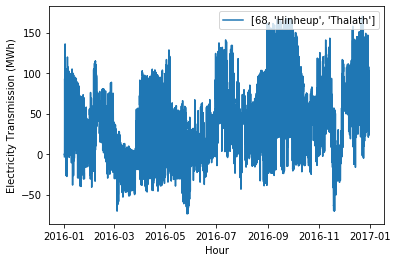

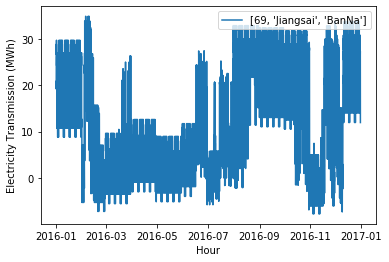

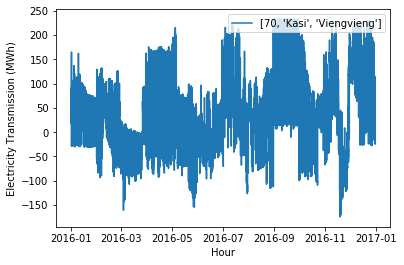

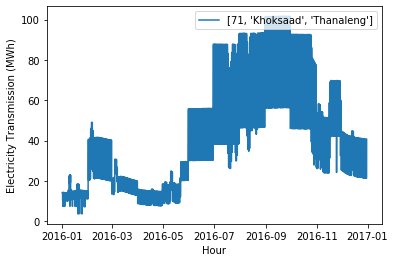

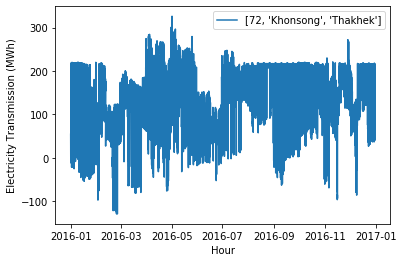

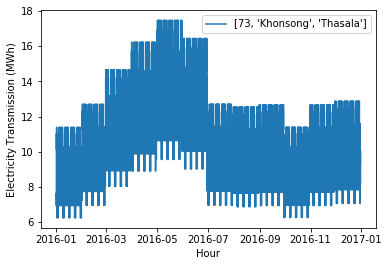

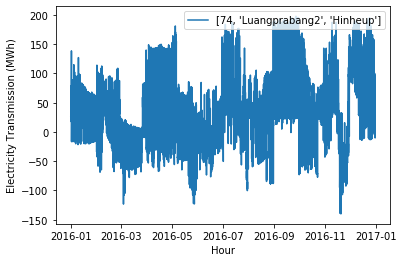

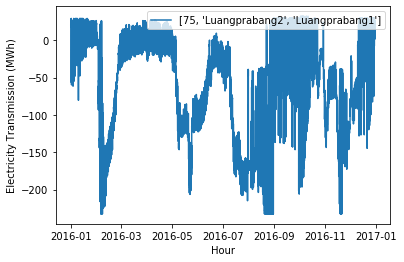

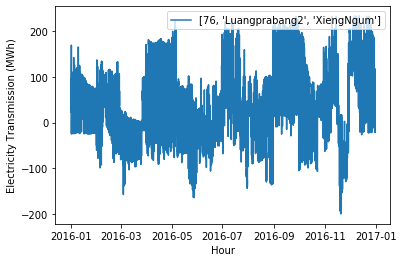

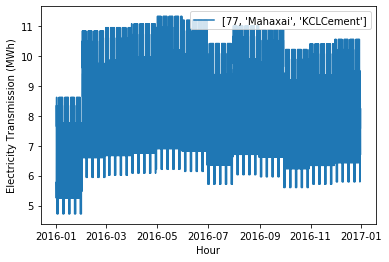

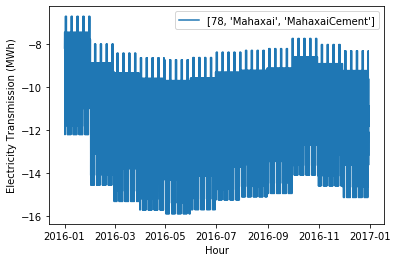

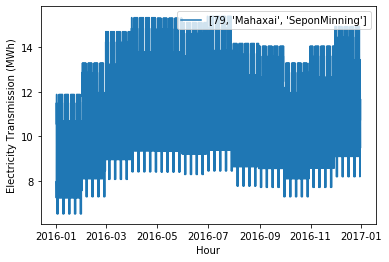

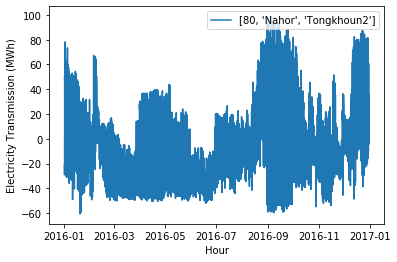

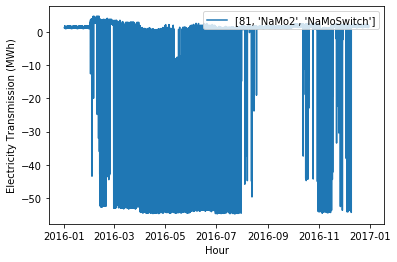

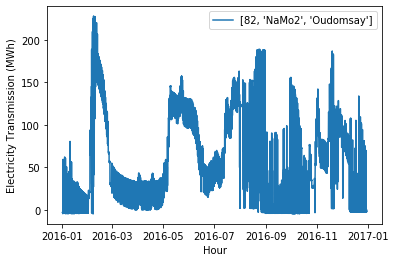

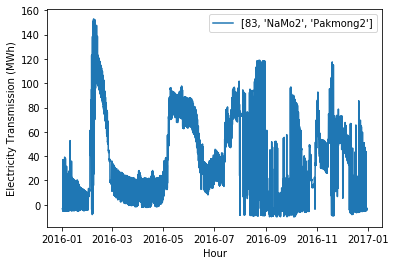

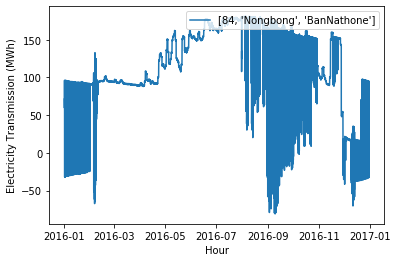

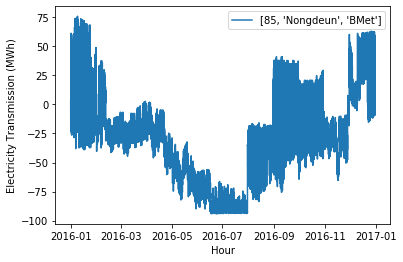

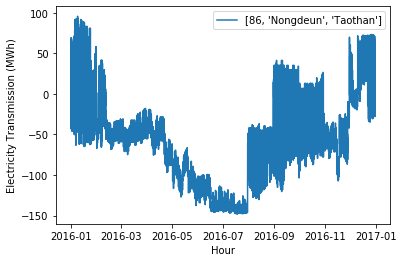

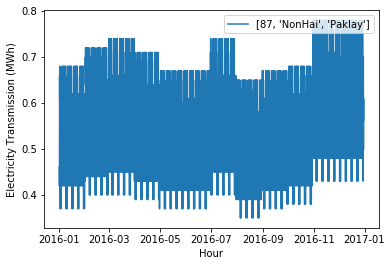

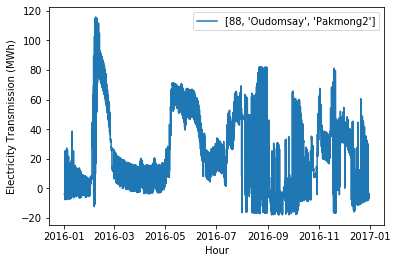

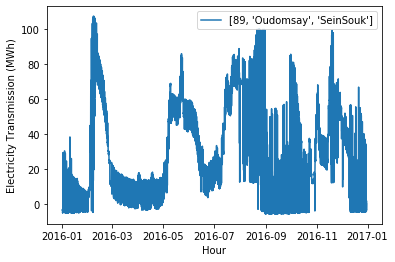

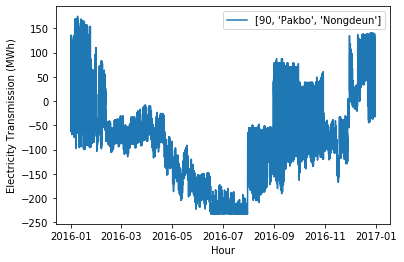

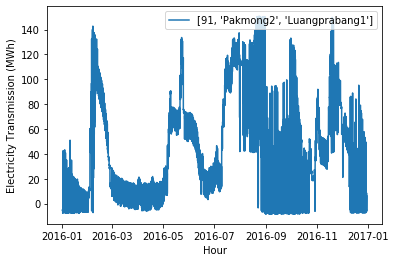

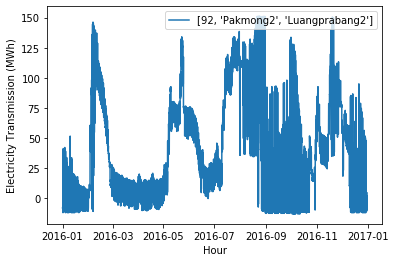

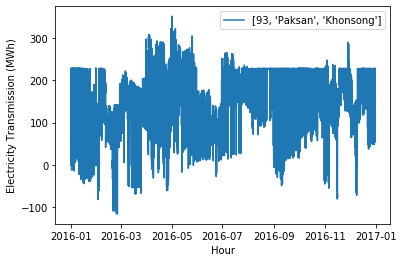

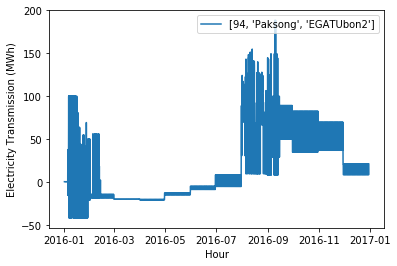

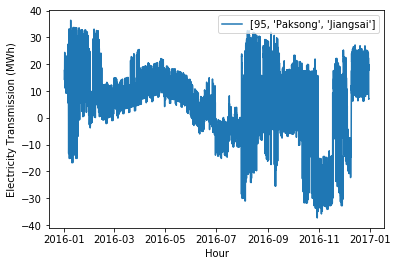

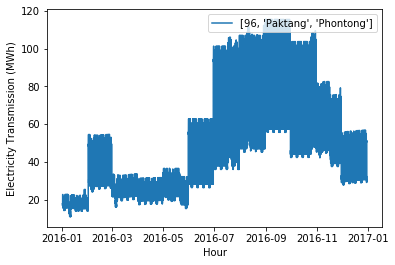

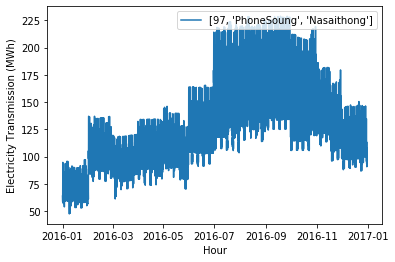

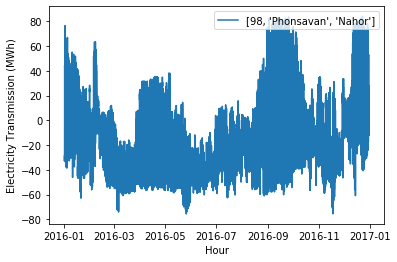

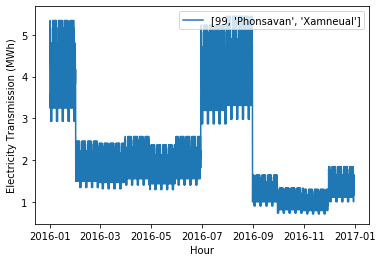

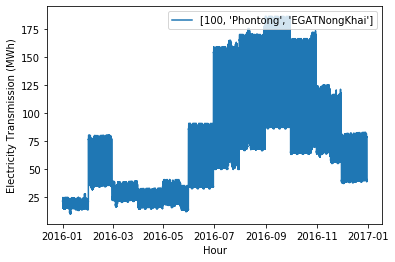

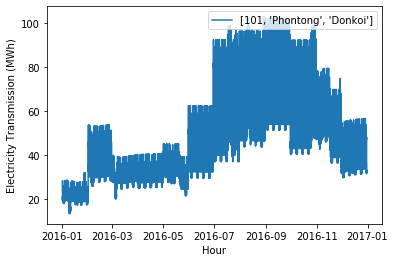

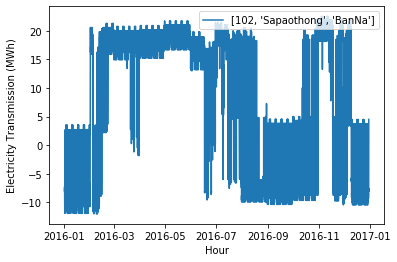

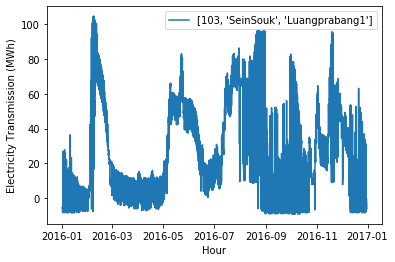

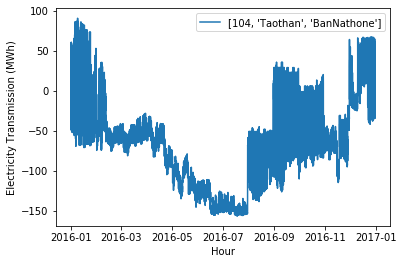

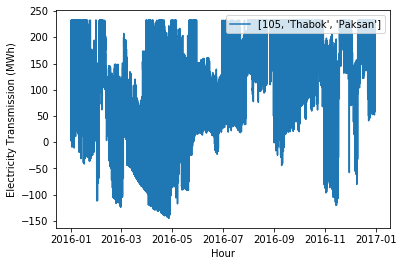

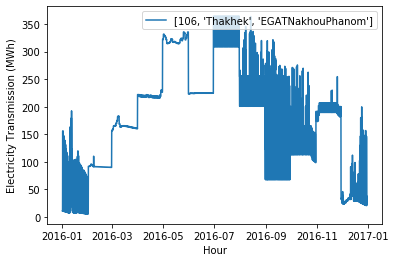

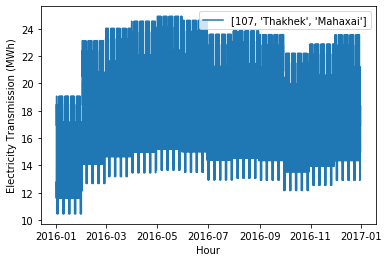

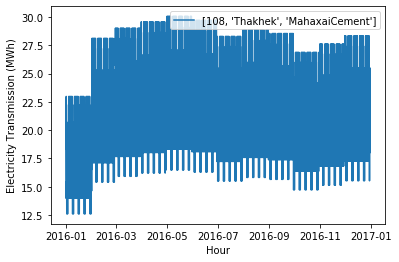

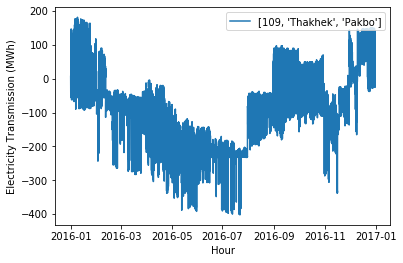

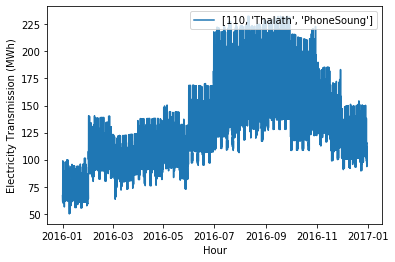

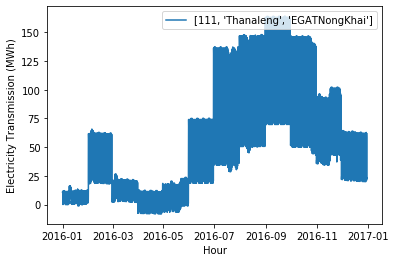

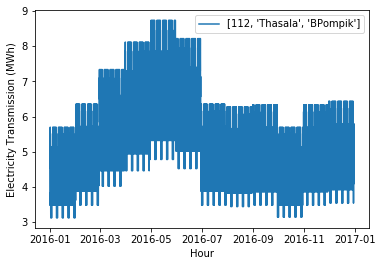

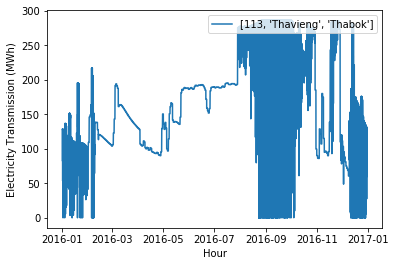

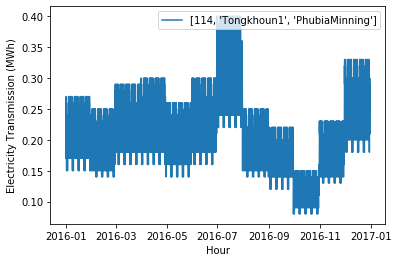

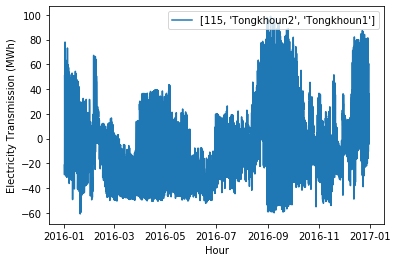

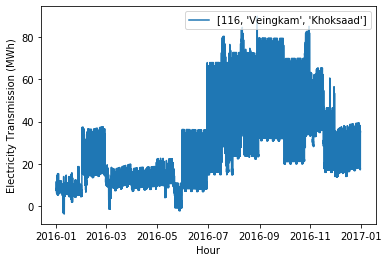

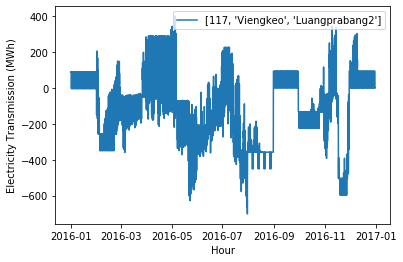

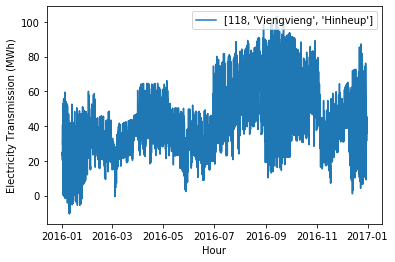

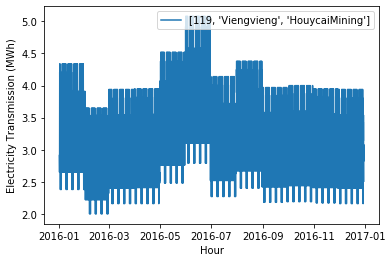

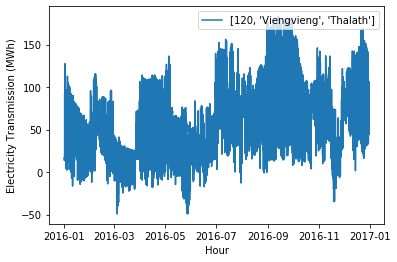

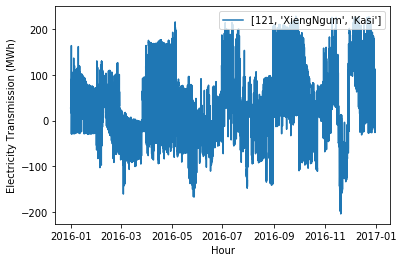

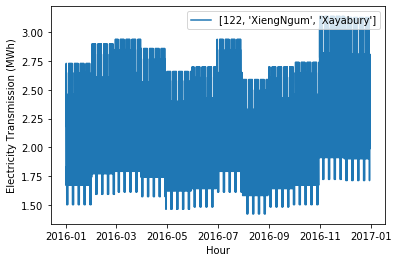

In [19]:
for i in range(len(trans_mwh)): 
    plt.figure() #figsize=(10,10)
    plt.plot(hr_range,trans_mwh[i],label=[i,trans_data[0][i],trans_data[1][i]])
    plt.ylabel('Electricity Transmission (MWh)')
    plt.xlabel('Hour')
    plt.legend(loc=1)